In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
%matplotlib inline

In [4]:
edu=pd.read_csv("fiuba_1_postulantes_educacion.csv")
edu.head(5)

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [5]:
gen=pd.read_csv("fiuba_2_postulantes_genero_y_edad.csv")
gen.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [6]:
vis=pd.read_csv("fiuba_3_vistas.csv")
vis.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [7]:
post=pd.read_csv("fiuba_4_postulaciones.csv")
post.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [8]:
aon=pd.read_csv("fiuba_5_avisos_online.csv")
aon.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [9]:
ade=pd.read_csv("fiuba_6_avisos_detalle.csv")
ade.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# Analizar la distribución de postulaciones a avisos según la fecha, dia del mes, dia de la semana, etc.
#Algunas de las preguntas que podrían plantearse son: Se recibe un volumen de postulaciones similar cualquier dia de
    la semana? Existen variaciones según el mes del año, o aun dentro del mes? Etc. 
Averiguar cuál es área de trabajo (nombre_area) sobre la cual se concentra mayor cantidad de ofertas laborales, 
y dentro de esta área, cuál es la zona (nombre_zona) en donde hay mas demanda.  


In [10]:
#Se recibe un volumen de postulaciones similar cualquier dia de la semana

post.fechapostulacion= pd.to_datetime(post.fechapostulacion, errors='coerce')

post["month"]=post.fechapostulacion.dt.month
post["day"]=post.fechapostulacion.dt.day
post["weekday"]=post.fechapostulacion.dt.weekday_name
post["weekday_"]=post.fechapostulacion.dt.weekday
post["date"]=post.fechapostulacion.dt.date
post.head()

,idaviso,idpostulante,fechapostulacion,month,day,weekday,weekday_,date
0,1112257047,NM5M,2018-01-15 16:22:34,1,15,Monday,0,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2,6,Tuesday,1,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2,22,Thursday,3,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2,22,Thursday,3,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,1,25,Thursday,3,2018-01-25


In [11]:
#limpieza de idaviso
post.dropna()

,idaviso,idpostulante,fechapostulacion,month,day,weekday,weekday_,date
0,1112257047,NM5M,2018-01-15 16:22:34,1,15,Monday,0,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2,6,Tuesday,1,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2,22,Thursday,3,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2,22,Thursday,3,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,1,25,Thursday,3,2018-01-25
5,1112277633,5awk,2018-01-29 13:34:44,1,29,Monday,0,2018-01-29
6,1112302347,5awk,2018-02-07 20:49:22,2,7,Wednesday,2,2018-02-07
7,1112291495,5awk,2018-02-07 20:50:13,2,7,Wednesday,2,2018-02-07
8,1112304011,5awk,2018-02-07 20:51:15,2,7,Wednesday,2,2018-02-07
9,1112326289,5awk,2018-02-09 20:24:57,2,9,Friday,4,2018-02-09


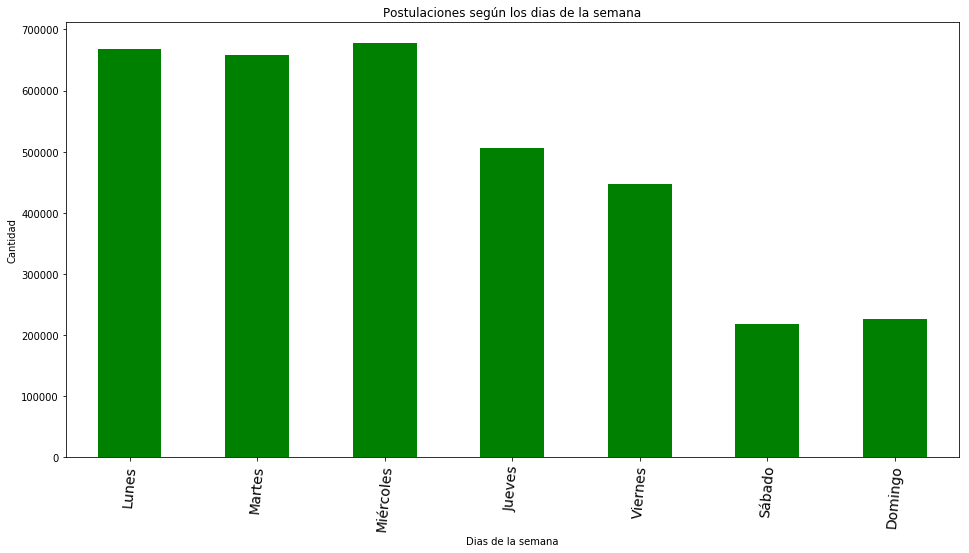

In [12]:
#La cantidad de postulaciones que se recibe por semana
Dia_semana=post.loc[:, ["weekday_", "idaviso"]].groupby("weekday_").count()
Dia_semana.plot(kind='bar',figsize=(16,8),rot=85,title='Postulaciones según los dias de la semana', color="g", legend=False);
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Dias de la semana');
ax.set_xticklabels([r'Lunes', r'Martes', r'Miércoles', r'Jueves', r'Viernes', r"Sábado", r"Domingo"], fontsize=14);




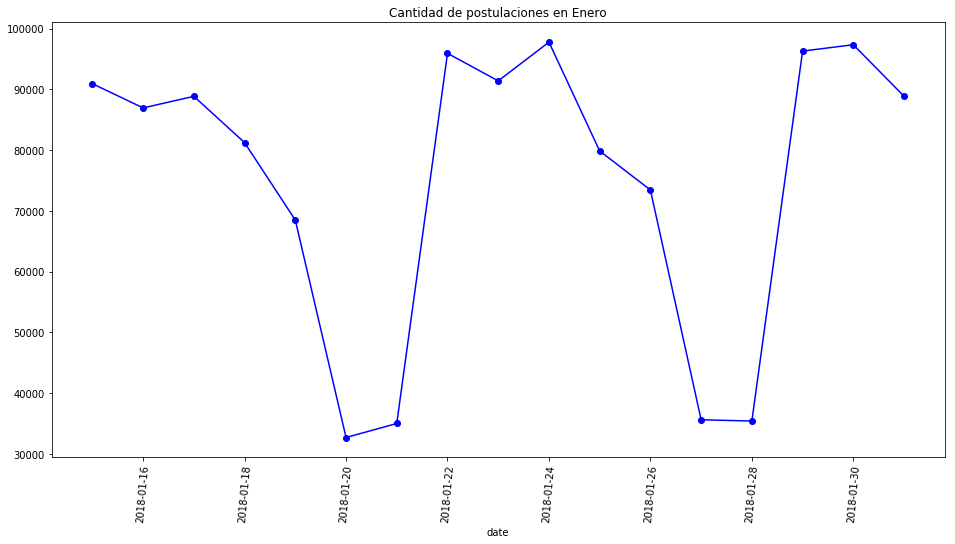

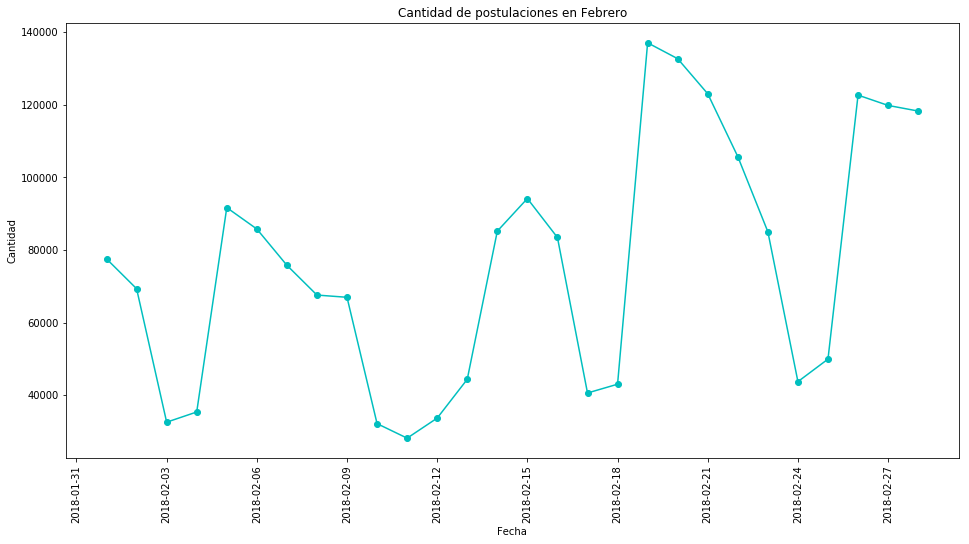

In [13]:
# Como no tenemos el mes de enero completo, vamos a analizar como se distribuye durante el mes, ya que en promedio dan la misma cantidad de postulaciones
post["date"].value_counts()
enero=post[post["month"]==1].loc[:, ["date", "idaviso"]].groupby("date").count()
febrero=post[post["month"]==2].loc[:, ["date", "idaviso"]].groupby("date").count()
enero.plot(figsize=(16, 8), rot=85,title='Cantidad de postulaciones en Enero', color="b", legend=False, marker="o")
febrero.plot(figsize=(16,8),rot=90,title='Cantidad de postulaciones en Febrero', color="c", marker="o", legend= False)
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Fecha');

Text(0,0.5,'Areas')

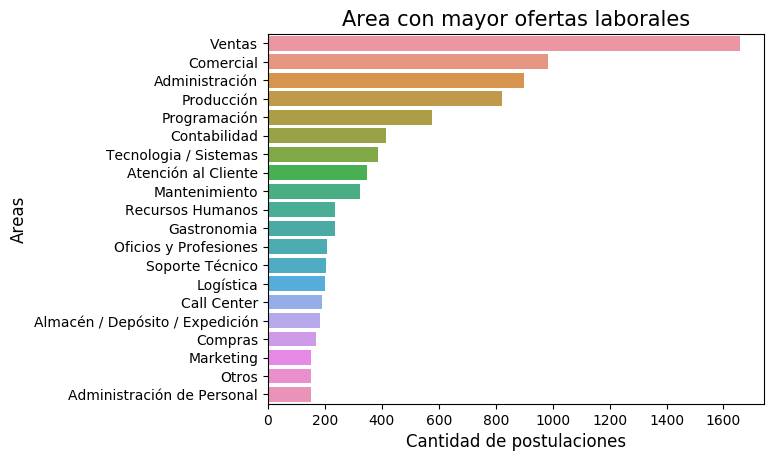

In [27]:
#Averiguar cuál es área de trabajo (nombre_area) sobre la cual se concentra mayor cantidad de ofertas laborales,
#y dentro de esta área, cuál es la zona (nombre_zona) en donde hay mas demanda. 
#idaviso 	idpais 	titulo 	descripcion 	nombre_zona 	ciudad 	mapacalle 	tipo_de_trabajo 	nivel_laboral 	nombre_area 	denominacion_empresa

g = sns.barplot(x=ade["nombre_area"].value_counts().head(20), y=ade["nombre_area"].value_counts().head(20).index, orient='h')
g.set_title("Area con mayor ofertas laborales", fontsize=15)
g.set_xlabel("Cantidad de postulaciones", fontsize=12)
g.set_ylabel("Areas", fontsize=12)


Text(0,0.5,'Cantidad de Proyectos')

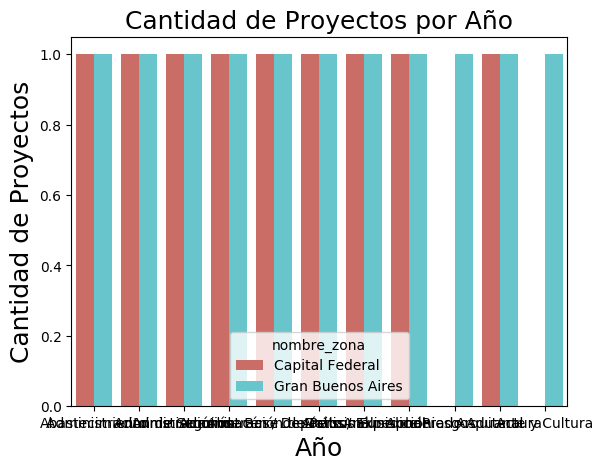

In [67]:
#area=ade.loc[:, ["nombre_area","nombre_zona", "idaviso"]].groupby(["nombre_area", "nombre_zona"]).count()
#area.plot(kind="bar",figsize=(16,8),rot=85,title='Postulaciones según los dias de la semana', color="g", legend=False);

ade_area20=ade.loc[:, ["nombre_area", "nombre_zona", "idaviso"]].groupby(["nombre_area", "nombre_zona"],as_index=False ).count().head(20)
g = sns.countplot(x="nombre_area", hue="nombre_zona", data=ade_area20, palette="hls")
g.set_title("Cantidad de Proyectos por Año", fontsize=18)
g.set_xlabel("Año", fontsize=18)
g.set_ylabel("Cantidad de Proyectos", fontsize=18)


In [60]:
ade_area20=ade.loc[:, ["nombre_area", "nombre_zona", "idaviso"]].groupby(["nombre_area", "nombre_zona"],as_index=False).count().head(20)
ade_area20

,nombre_area,nombre_zona,idaviso
0,Abastecimiento,Capital Federal,3
1,Abastecimiento,Gran Buenos Aires,53
2,Administracion de Seguros,Capital Federal,1
3,Administracion de Seguros,Gran Buenos Aires,17
4,Administración,Capital Federal,67
5,Administración,Gran Buenos Aires,834
6,Administración de Base de Datos,Capital Federal,1
7,Administración de Base de Datos,Gran Buenos Aires,15
8,Administración de Personal,Capital Federal,10
9,Administración de Personal,Gran Buenos Aires,142
